## Preprocessing Data of Fire Forest on Indonesia from 2001 to 2023

In [1]:
# Main Lib
import pandas as pd 
import numpy as np 

pd.set_option('display.width', 1000)
pd.set_option('display.max_columns', 1000)

import matplotlib.pyplot as plt 
import seaborn as sns
import plotly.express as px 

### Step 1. Data Acquisition

In [2]:
df_hotspot = pd.read_csv("../Dataset/DL_FIRE_M-C61_562233/fire_archive_M-C61_562233.csv", parse_dates=["acq_date"])
print(df_hotspot)

         latitude  longitude  brightness  scan  track   acq_date  acq_time satellite instrument  confidence  version  bright_t31   frp daynight  type
0         -4.0082   121.7859       312.0   2.3    1.5 2001-01-01       258     Terra      MODIS          57     6.03       291.7  22.9        D     0
1         -8.1135   112.9281       359.1   1.1    1.0 2001-01-01       259     Terra      MODIS          99     6.03       310.8  84.3        D     1
2         -8.4164   117.5434       320.0   1.3    1.1 2001-01-01       259     Terra      MODIS          39     6.03       305.8  13.1        D     0
3         -8.1127   112.9221       309.8   1.0    1.0 2001-01-01      1516     Terra      MODIS          78     6.03       276.7  13.3        N     1
4         -6.9726   107.6152       314.3   1.4    1.2 2001-01-02       342     Terra      MODIS          62     6.03       284.7  11.4        D     2
...           ...        ...         ...   ...    ...        ...       ...       ...        ...     

### Step 2. Praprocess Data

- Function of Aggregation Daily

In [3]:
## ==> Data Aggregation
def hotspot_daily(df):

    result = df.groupby(["acq_date"]).size().reset_index(name='hotspot')

    result = result.set_index("acq_date")

    return result

- Function of Monthly Aggregation

In [4]:
# ## ==> Data Aggregation
# def hotspot_monthly(df):

#     result = df.groupby(["acq_date"]).size().reset_index(name='hotspot')

#     result = result.set_index("acq_date")

#     result = result.resample('ME').sum()

#     return result

In [5]:
dataset = hotspot_daily(df_hotspot)
dataset = dataset.reset_index()
dataset

,acq_date,hotspot
0,2001-01-01,4
1,2001-01-02,1
2,2001-01-03,2
3,2001-01-04,1
4,2001-01-05,1
...,...,...
8301,2023-12-27,34
8302,2023-12-28,32
8303,2023-12-29,44
8304,2023-12-30,17


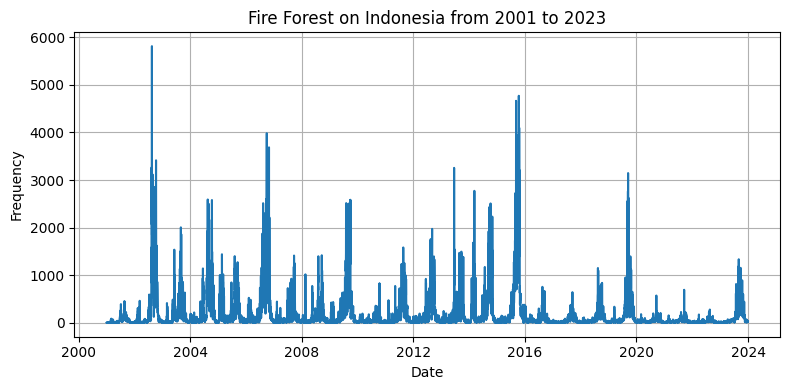

In [6]:
fig, ax = plt.subplots(figsize=(8, 4))
sns.lineplot(data=dataset, x=dataset["acq_date"], y=dataset["hotspot"])

ax.set_title('Fire Forest on Indonesia from 2001 to 2023')
ax.set_xlabel('Date')
ax.set_ylabel('Frequency')
# ax.legend(loc="best")
ax.grid(True)

plt.tight_layout()
plt.show()

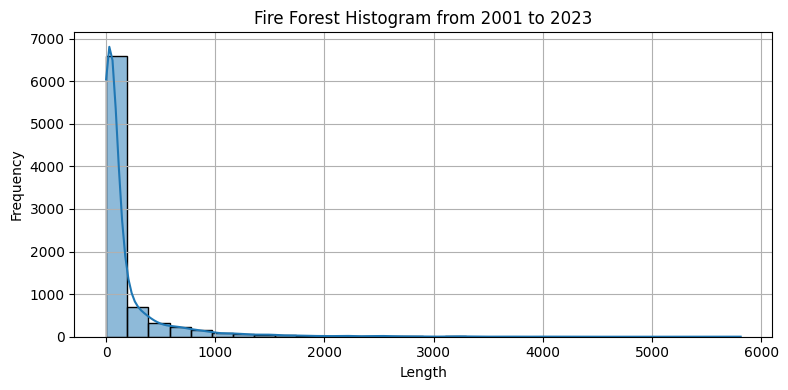

In [7]:
fig, ax = plt.subplots(figsize=(8, 4))
sns.histplot(data=dataset["hotspot"], bins=30, kde=True)

ax.set_title('Fire Forest Histogram from 2001 to 2023')
ax.set_xlabel('Length')
ax.set_ylabel('Frequency')
# ax.legend(loc="best")
ax.grid(True)

plt.tight_layout()
plt.show()

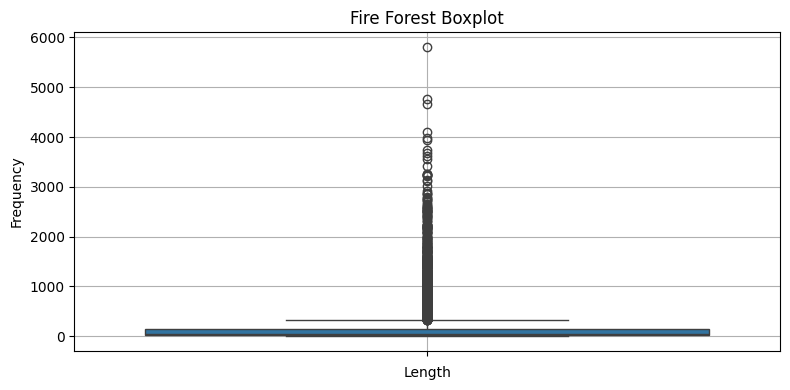

In [8]:
fig, ax = plt.subplots(figsize=(8, 4))
sns.boxplot(data=dataset, y="hotspot")

ax.set_title('Fire Forest Boxplot')
ax.set_xlabel('Length')
ax.set_ylabel('Frequency')
# ax.legend(loc="best")
ax.grid(True)

plt.tight_layout()
plt.show()

### Step 3. Export Dataset to CSV

In [9]:
# dataset.to_csv("../Dataset/Hotspot_Monthly.csv", index=None)

In [10]:
df_hotspot

,latitude,longitude,brightness,scan,track,acq_date,acq_time,satellite,instrument,confidence,version,bright_t31,frp,daynight,type
0,-4.0082,121.7859,312.0,2.3,1.5,2001-01-01,258,Terra,MODIS,57,6.03,291.7,22.9,D,0
1,-8.1135,112.9281,359.1,1.1,1.0,2001-01-01,259,Terra,MODIS,99,6.03,310.8,84.3,D,1
2,-8.4164,117.5434,320.0,1.3,1.1,2001-01-01,259,Terra,MODIS,39,6.03,305.8,13.1,D,0
3,-8.1127,112.9221,309.8,1.0,1.0,2001-01-01,1516,Terra,MODIS,78,6.03,276.7,13.3,N,1
4,-6.9726,107.6152,314.3,1.4,1.2,2001-01-02,342,Terra,MODIS,62,6.03,284.7,11.4,D,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1490967,-3.9057,122.4212,315.8,1.0,1.0,2023-12-31,1352,Terra,MODIS,92,61.03,294.0,11.7,N,2
1490968,-3.8727,122.3917,309.5,1.0,1.0,2023-12-31,1352,Terra,MODIS,78,61.03,294.2,6.9,N,2
1490969,0.5582,123.9556,306.5,1.3,1.1,2023-12-31,1353,Terra,MODIS,68,61.03,292.0,8.5,N,0
1490970,0.6945,117.5580,308.2,1.0,1.0,2023-12-31,1813,Aqua,MODIS,74,61.03,286.7,7.4,N,0


In [11]:
dataset.tail()

,acq_date,hotspot
8301,2023-12-27,34
8302,2023-12-28,32
8303,2023-12-29,44
8304,2023-12-30,17
8305,2023-12-31,25


In [12]:
dataset["hotspot"].sum()

1490972